Saving download.jpg to download (1).jpg
Original Image:


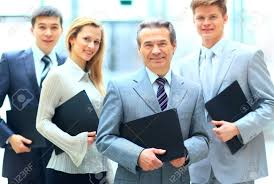

Tracked Objects in Image:


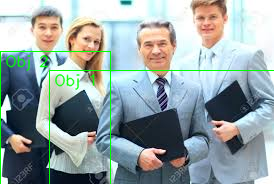

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# ================= STEP 1: UPLOAD IMAGE =================
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded file name
image = cv2.imread("/content/sample_data/download.jpg")
original_image = image.copy()

# ================= STEP 2: CONVERT TO GRAYSCALE =================
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ================= STEP 3: APPLY THRESHOLD =================
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)[1]  # Improved contrast
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ================= STEP 4: DRAW FILTERED BOUNDING BOXES =================
object_count = 0
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Ignore small objects (avoiding noise)
    if w * h < 2000:
        continue

    object_count += 1
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)  # Thinner border

    # Adjust label placement
    text_x = max(5, x + 5)
    text_y = max(15, y + 15)
    cv2.putText(image, f"Obj {object_count}", (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# ================= STEP 5: DISPLAY OUTPUT =================
print("Original Image:")
cv2_imshow(original_image)

print("Tracked Objects in Image:")
cv2_imshow(image)
